In [163]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/fangsiyu/Desktop/intro_pj/cleaning_process/life expected.csv")
df

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,75.92,76.07,76.21,76.36,76.50,76.65,76.80,76.95,77.10,77.25
1,ago,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,75.75,75.87,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91
2,alb,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,88.93,89.05,89.17,89.28,89.40,89.51,89.62,89.73,89.84,89.95
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.02,91.14,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04
4,are,UAE,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,83.67,83.78,83.90,84.02,84.14,84.24,84.35,84.47,84.58,84.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,wsm,Samoa,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,81.11,81.25,81.38,81.51,81.64,81.77,81.90,82.02,82.15,82.27
190,yem,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,80.59,80.76,80.92,81.08,81.25,81.40,81.58,81.75,81.92,82.08
191,zaf,South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,74.02,74.15,74.29,74.42,74.55,74.69,74.82,74.96,75.09,75.24
192,zmb,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,73.29,73.42,73.55,73.69,73.81,73.95,74.08,74.22,74.35,74.48


/var/folders/s0/f874234s21s4w3fp3rnc3rfm0000gn/T/ipykernel_16758/2397145264.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')


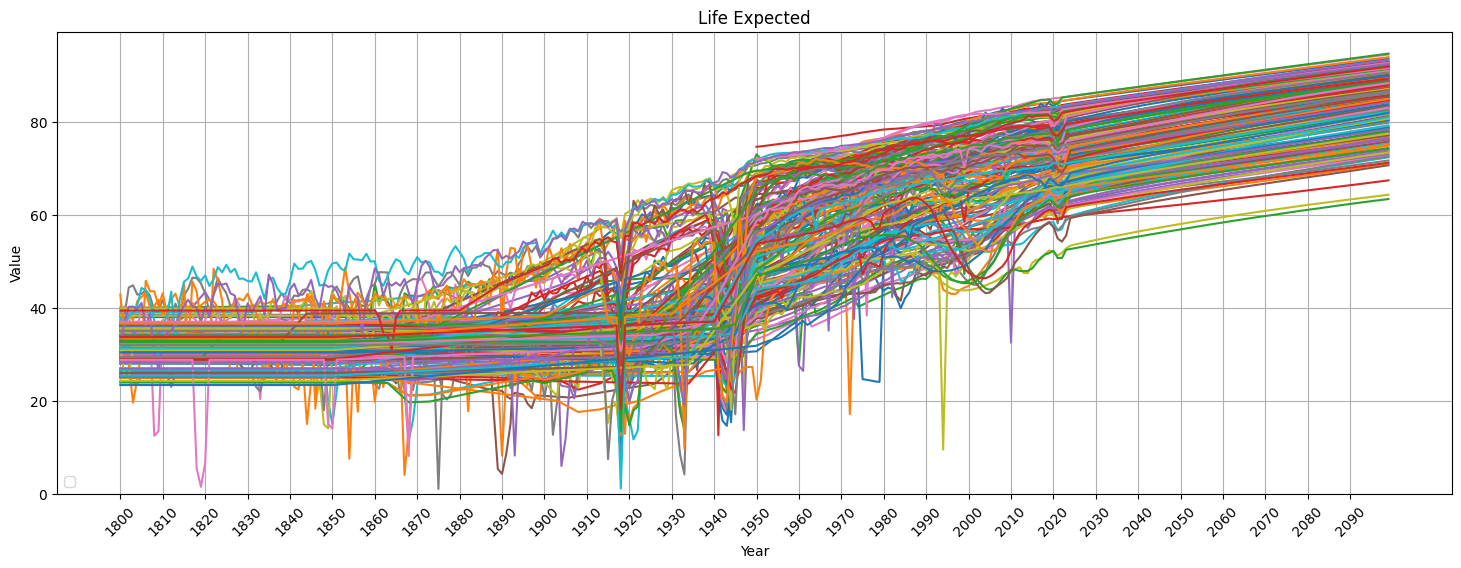

In [164]:
years = df.columns[2:-1]

plt.figure(figsize=(18, 6))
for index, row in df.iterrows():
    plt.plot(years, row[years]) # , label=index # for the index

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Life Expected")
plt.xticks(years[::10],rotation=45)
plt.ylim(bottom=0)
plt.legend(loc='lower left')
plt.grid()
plt.show()

---
## 1. Search for empty blocks, of each year

10 countries lack almost half of the data, 1 of the country lack 3/4 of the data. 

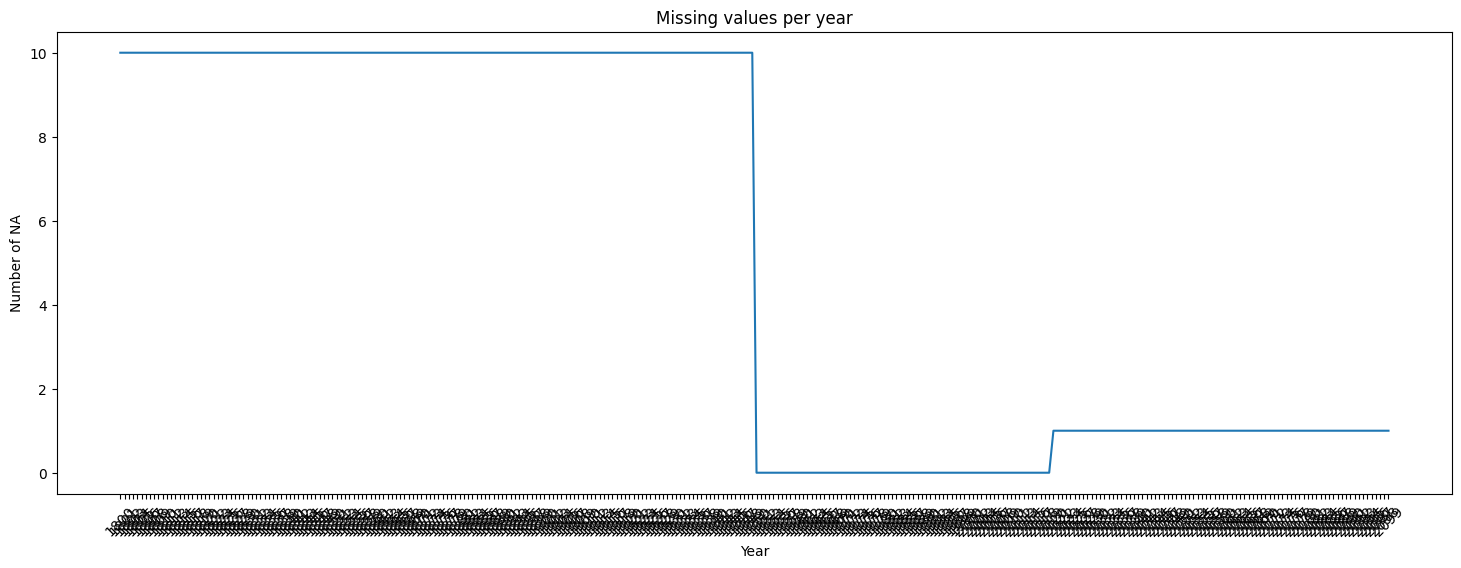

In [165]:
nan_year = df.iloc[:, 2:-1].isna().sum()
plt.figure(figsize=(18, 6)) # this should alway be the first step
plt.plot(nan_year.index, nan_year.values)
plt.title("Missing values per year")
plt.xlabel("Year")
plt.ylabel("Number of NA")
plt.xticks(rotation=45)
plt.show()


---
## 2. Search for empty blocks, of each countries

These are the countries missed the data, but they somehow have the similar pattern.

In [166]:
df['na_sum_each_c'] = df.isna().sum(axis=1)
df[df['na_sum_each_c'] > 0] 

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,na_sum_each_c
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.14,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04,150
46,dma,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.40,83.52,83.65,83.77,83.89,84.01,84.14,84.26,84.38,150
92,kna,St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.33,83.47,83.61,83.73,83.87,83.99,84.13,84.26,84.39,150
100,lie,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231
107,mco,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.76,87.87,87.96,88.07,88.17,88.27,88.38,88.48,88.59,150
112,mhl,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.21,74.33,74.45,74.58,74.71,74.84,74.97,75.10,75.23,150
131,nru,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.82,73.96,74.11,74.25,74.41,74.56,74.71,74.86,75.00,150
138,plw,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.40,79.57,79.73,79.90,80.07,80.23,80.40,80.56,80.73,150
156,smr,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.79,90.90,91.00,91.12,91.23,91.34,91.46,91.56,91.68,150
178,tuv,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.61,79.77,79.94,80.10,80.25,80.41,80.56,80.72,80.87,150


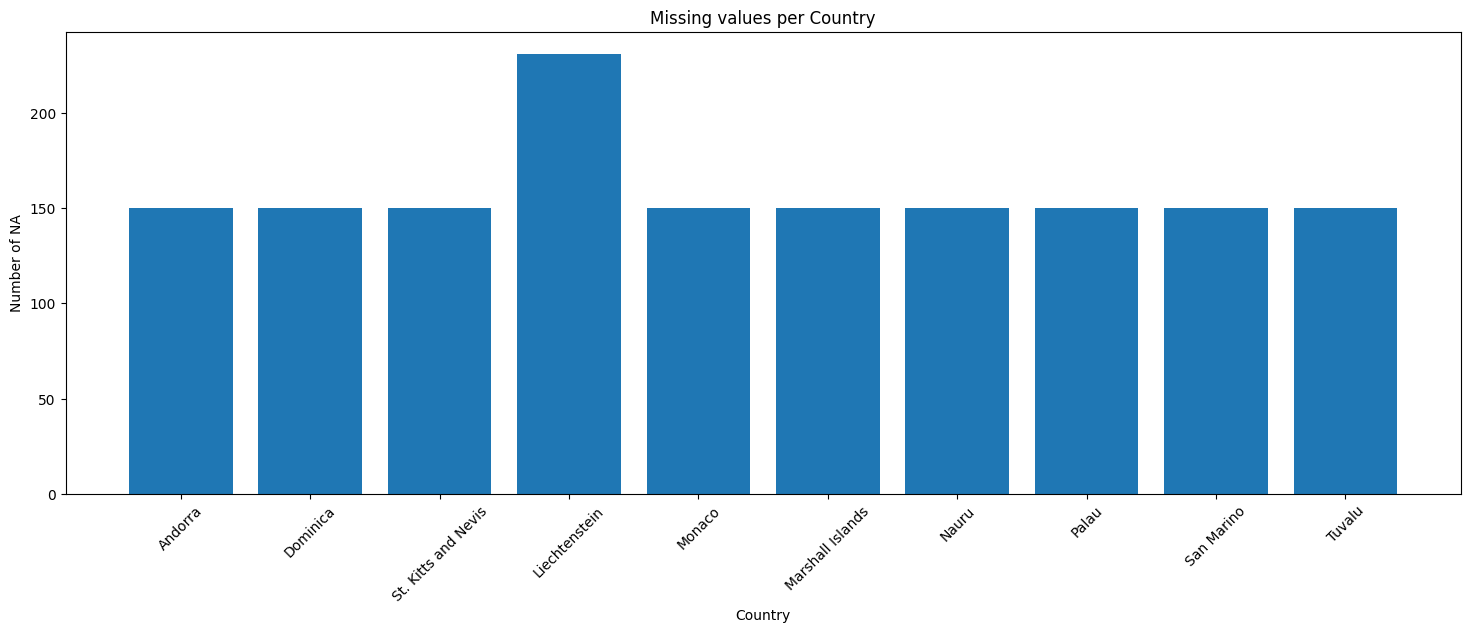

In [167]:
mask = df['na_sum_each_c'] > 0

plt.figure(figsize=(18, 6)) # this should alway be the first step
plt.bar(df.loc[mask,'name'], df.loc[mask, 'na_sum_each_c']) # just dump the pd.series into it, no need the .values
plt.title("Missing values per Country")
plt.xlabel("Country")
plt.ylabel("Number of NA")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.show()

---
## 3. Search for empty blocks, plot of empty data countries

We can see these arn't just missing 1 or 2 blocks, but lacking almost half of the data.
It might be better to drop these rows, preventing mass up further calculation.

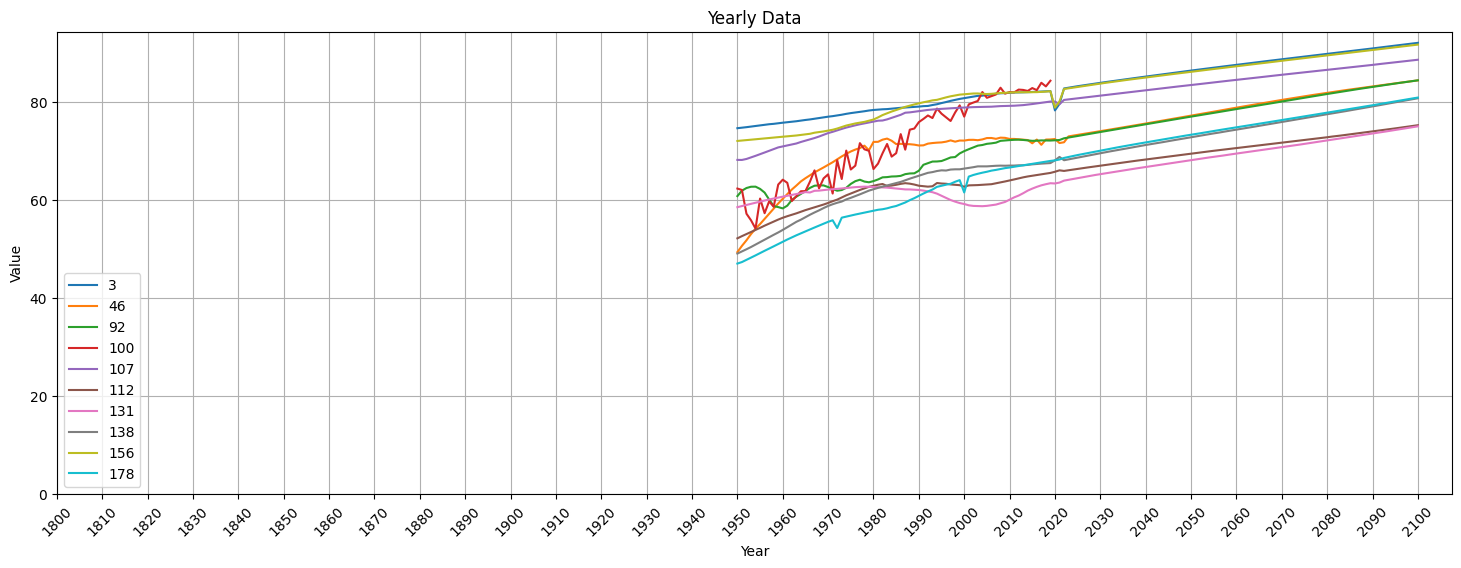

In [168]:
df_masked = df[df['na_sum_each_c']>0]

years = df.columns[2:-1]
plt.figure(figsize=(18, 6))
for index, row in df_masked.iterrows():
    plt.plot(years, row[years], label=index)

plt.title("Yearly Data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(years[::10],rotation=45)
plt.ylim(bottom=0)
plt.legend(loc='lower left')
plt.grid()
plt.show()

---
## Conclusion 1,

Since the missing data for these 10 countries is more than 150 years, it's better for us to drop, rather then making imputed data.

Additionally, it requires more technic and effort to generate these data, which might off the topic of data cleaning.



---
## Conclusion 2,

We can filter the imputed data in this dataset, by calculate the acceleration of each year.

The real data of each country should be dynamic, means the acceleration will have a low possibility of 0. Besides, we should also be aware of the machine-noise, by setting the floor as $epsilon = 1e-12$ to avoid it.

Later on, we can easily get the ratio of high reliable data vs machine-noise & imputed data.

In [169]:
df_artificial = df.iloc[:, 2:-1].diff(axis=1).diff(axis=1)
df_artificial

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,NaN,NaN,3.552714e-15,-3.552714e-15,3.552714e-15,-3.552714e-15,0.0,3.552714e-15,-3.552714e-15,3.552714e-15,...,-1.000000e-02,1.000000e-02,-1.000000e-02,1.000000e-02,-1.000000e-02,0.01,-1.421085e-14,1.421085e-14,-1.421085e-14,1.421085e-14
1,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,1.421085e-14,0.000000e+00,-1.421085e-14,1.000000e-02,1.000000e-02,-0.01,0.000000e+00,1.421085e-14,1.000000e-02,-2.000000e-02
2,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,1.421085e-14,1.000000e-02,1.421085e-14,-1.000000e-02,1.000000e-02,-0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e-02,1.421085e-14,-1.000000e-02,0.000000e+00,0.000000e+00,0.01,-1.421085e-14,-1.000000e-02,1.421085e-14,-1.421085e-14
4,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e-02,-2.000000e-02,1.000000e-02,-1.421085e-14,1.421085e-14,-0.02,1.000000e-02,1.000000e-02,-1.000000e-02,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.421085e-14,1.000000e-02,-1.000000e-02,1.421085e-14,-1.421085e-14,0.00,1.421085e-14,-1.000000e-02,1.000000e-02,-1.000000e-02
190,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e-02,1.000000e-02,-1.000000e-02,0.000000e+00,1.000000e-02,-0.02,3.000000e-02,-1.000000e-02,0.000000e+00,-1.000000e-02
191,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e-02,1.421085e-14,1.000000e-02,-1.000000e-02,0.000000e+00,0.01,-1.000000e-02,1.000000e-02,-1.000000e-02,2.000000e-02
192,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,1.421085e-14,-1.421085e-14,0.000000e+00,1.000000e-02,-2.000000e-02,0.02,-1.000000e-02,1.000000e-02,-1.000000e-02,1.421085e-14


In [178]:
((df_artificial.abs() > 1e-12).sum(axis=1)) / 301

0      0.624585
1      0.478405
2      0.684385
3      0.342193
4      0.528239
         ...   
189    0.481728
190    0.621262
191    0.687708
192    0.514950
193    0.647841
Length: 194, dtype: float64

---
## Conclusion 3,

I try to estimate the year that the data for each country turns more reliable rather then imputed, however it's difficult to offer a statistical reason to pick up a specific year.

But base on the plot, even though we're not able to select the starting year, we can still get the ending year of reliable data.

As we can see the acceleration of each country after 2025 lost the dynamic, this might be the ending point of real data.



/var/folders/s0/f874234s21s4w3fp3rnc3rfm0000gn/T/ipykernel_16758/3666959516.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')


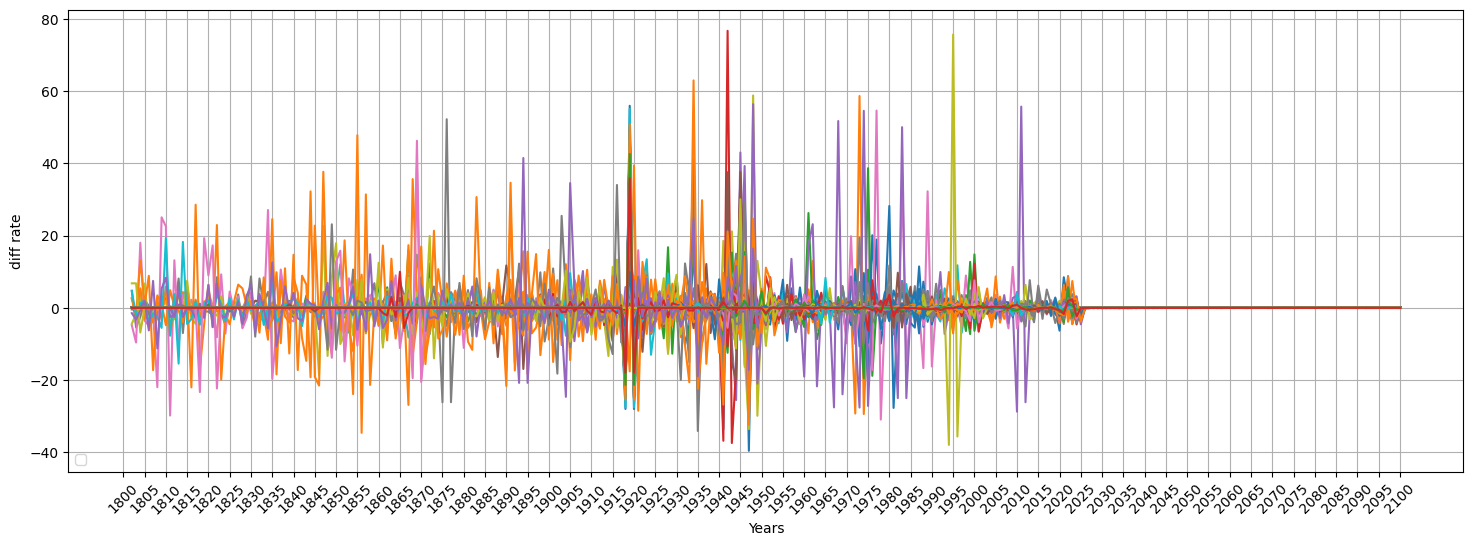

In [171]:
years = df.columns[2:-1]

plt.figure(figsize=(18,6))
for index, row in df_artificial.iterrows():
    plt.plot(years, row[years]) # , label=index

plt.xlabel("Years")
plt.ylabel("diff rate")
plt.xticks(years[::5],rotation=45)
plt.legend(loc='lower left')
plt.grid()
plt.show()

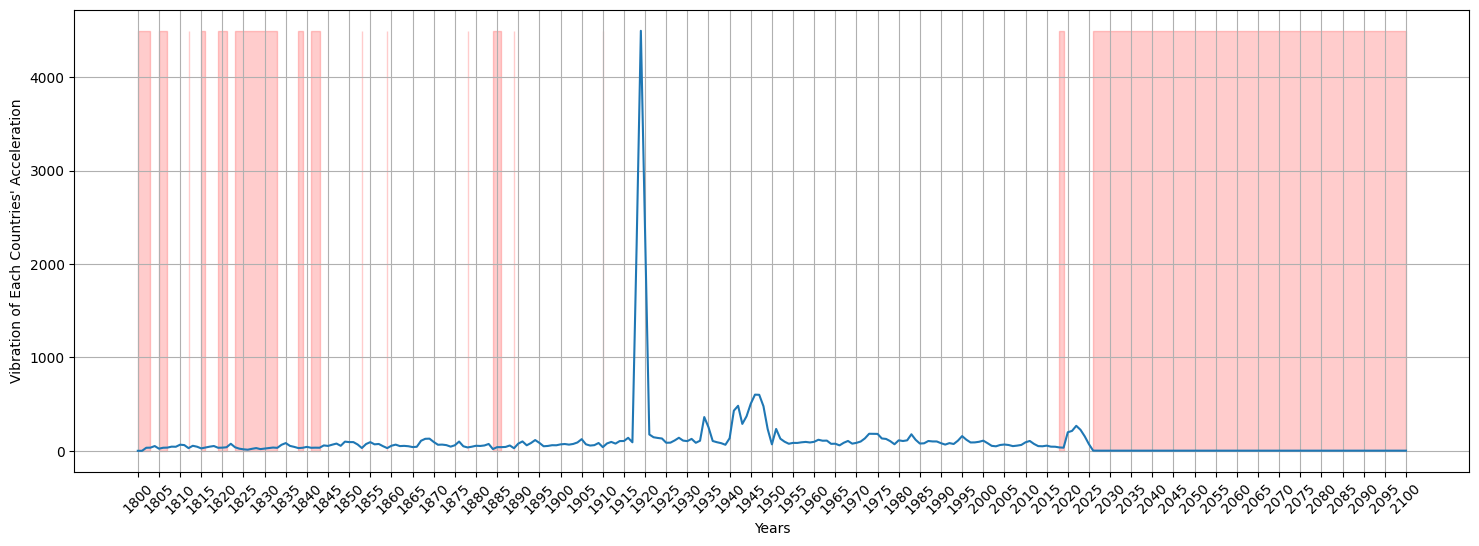

In [175]:
tt = df_artificial.abs().sum()

plt.figure(figsize=(18,6))
plt.plot(tt.index, tt.values)

plt.fill_between(tt.index, 0, tt.max(), 
                 where=(tt < 40), 
                 color='red', alpha=0.2)

plt.xticks(years[::5],rotation=45)
plt.xlabel("Years")
plt.ylabel("Vibration of Each Countries' Acceleration")
plt.grid()
plt.show()